## numpy의 polyfit 사용한 회귀분석

###### data 준비

In [1]:
# pandas_datareader는 터미널에서 pip install pandas_datareader로 설치
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글폰트 문제 해결
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')
    
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# PinkWink의 블로그 트래픽 데이터 받기. data폴더에 미리 넣어둔 csv파일 읽어오기
pinkwink_web = pd.read_csv('./data/08. PinkWink Web Traffic.csv', 
                   encoding='utf-8', thousands=',',
                   names=['date', 'hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


In [4]:
pinkwink_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 16. 7. 1. to 17. 6. 30.
Data columns (total 1 columns):
hit    365 non-null float64
dtypes: float64(1)
memory usage: 5.7+ KB


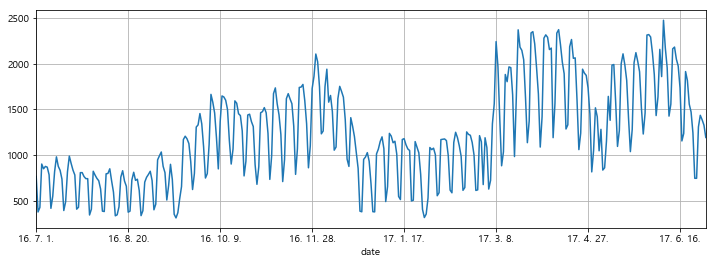

In [5]:
pinkwink_web['hit'].plot(figsize=(12, 4), grid=True)

###### regression

In [6]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

In [7]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [8]:
f1p = np.polyfit(time, traffic, 1)
f1 = np.poly1d(f1p)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.859730811
430.628410189
429.532804668
330.477730665


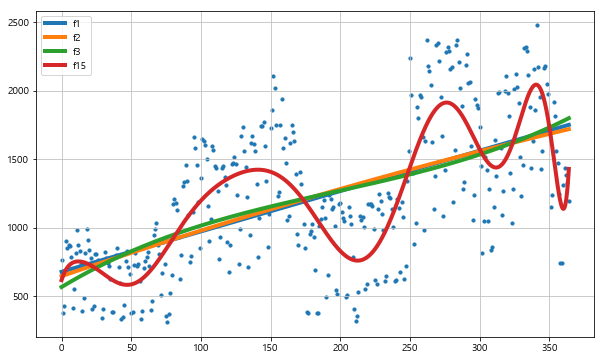

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

fx = np.linspace(0, time[-1], 1000)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

## Prophet 모듈을 이용한 forecast

In [10]:
# 윈도우유저인 경우 Visual C++ Build Tools를 먼저 설치.
# conda install -c conda-forge fbprophet으로 prophet 설치. 
# 윈도우의 경우 터미널을 관리자 권한으로 실행해야함.

from fbprophet import Prophet
from datetime import datetime

In [11]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [12]:
df.tail()

,ds,y
360,2017-06-26,1309.0
361,2017-06-27,1436.0
362,2017-06-28,1387.0
363,2017-06-29,1328.0
364,2017-06-30,1193.0


In [13]:
m = Prophet(yearly_seasonality=True)
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [15]:
forecast = m.predict(future)
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2016-07-01,1059.263169,1059.263169,1059.263169,526.852063,940.248147,-330.262778,-330.262778,-330.262778,0.0,0.0,0.0,-51.441964,-51.441964,-51.441964,-278.820814,-278.820814,-278.820814,729.000391
1,2016-07-02,1060.117429,1060.117429,1060.117429,98.964877,508.463712,-761.913634,-761.913634,-761.913634,0.0,0.0,0.0,-467.402693,-467.402693,-467.402693,-294.510941,-294.510941,-294.510941,298.203795
2,2016-07-03,1060.971688,1060.971688,1060.971688,190.827802,639.459083,-642.408621,-642.408621,-642.408621,0.0,0.0,0.0,-335.283826,-335.283826,-335.283826,-307.124795,-307.124795,-307.124795,418.563067
3,2016-07-04,1061.825948,1061.825948,1061.825948,748.033926,1162.267029,-99.601163,-99.601163,-99.601163,0.0,0.0,0.0,217.285059,217.285059,217.285059,-316.886222,-316.886222,-316.886222,962.224784
4,2016-07-05,1062.680207,1062.680207,1062.680207,790.953510,1193.306536,-70.642280,-70.642280,-70.642280,0.0,0.0,0.0,253.418887,253.418887,253.418887,-324.061167,-324.061167,-324.061167,992.037926


In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.761130,698.456541,1123.761594
421,2017-08-26,497.711704,292.436603,705.846529
422,2017-08-27,630.268176,422.166982,847.319629
423,2017-08-28,1182.888299,968.472257,1381.260197
424,2017-08-29,1218.800002,1007.333029,1421.878481


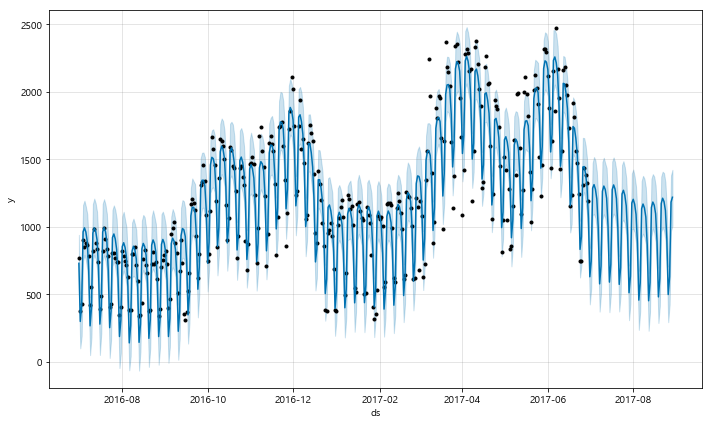

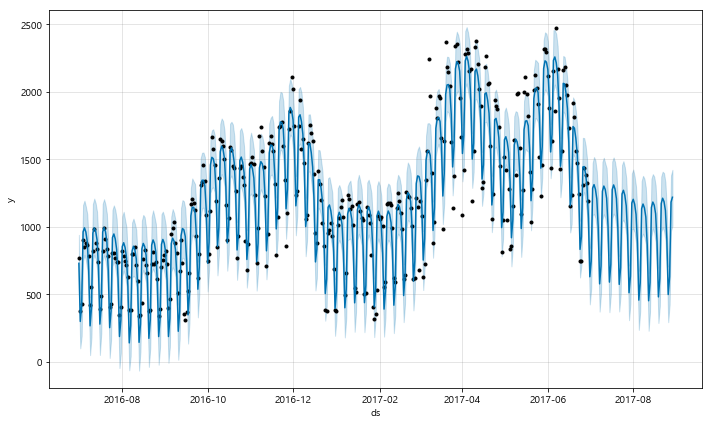

In [17]:
m.plot(forecast)

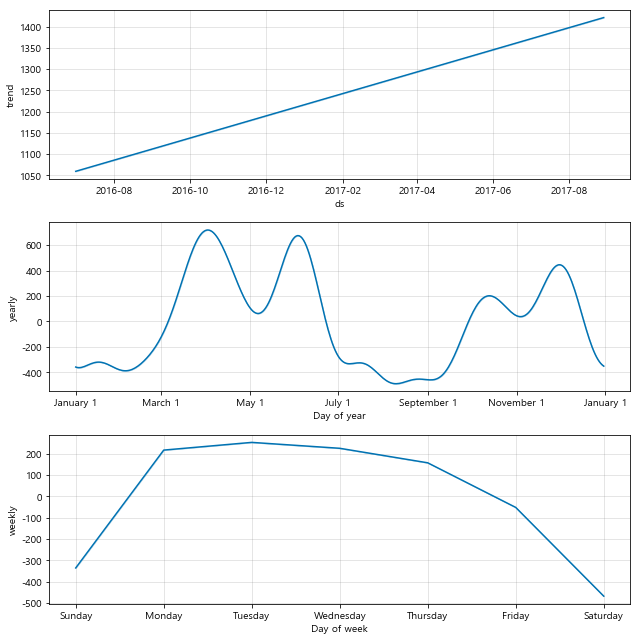

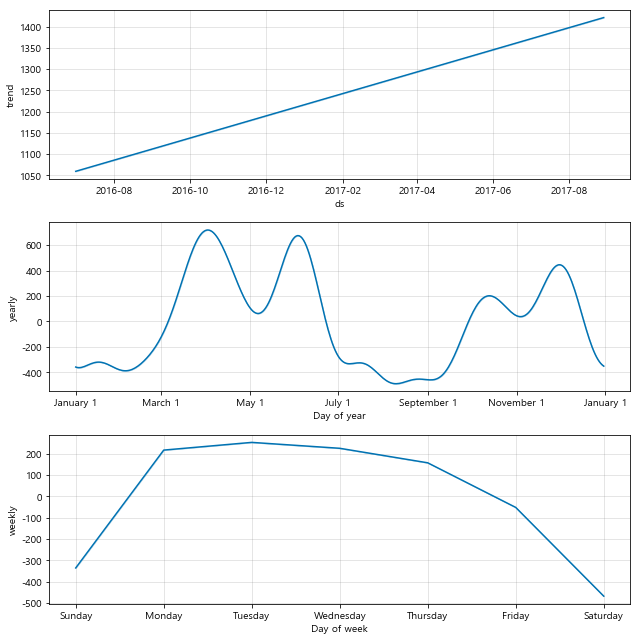

In [18]:
m.plot_components(forecast)

## Seasonal 시계열 분석으로 주식데이터 분석

In [19]:
# 터미널에서 pip install fix_yahoo_finance
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

###### 기아차 장기시계열 분석

In [20]:
start_date = '1990-1-1'
end_date = '2017-6-30'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5963.754395,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5639.200684,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5395.779297,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5274.072754,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5517.486816,1076700


In [21]:
KIA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-26,38800.0,39000.0,38450.0,38650.0,37718.675781,439880
2017-06-27,38550.0,38550.0,37850.0,38000.0,37084.339844,896530
2017-06-28,38000.0,38300.0,37600.0,37850.0,36937.953125,749536
2017-06-29,38000.0,38450.0,37800.0,38150.0,37230.722656,491434
2017-06-30,38050.0,38200.0,37700.0,38200.0,37279.519531,457483


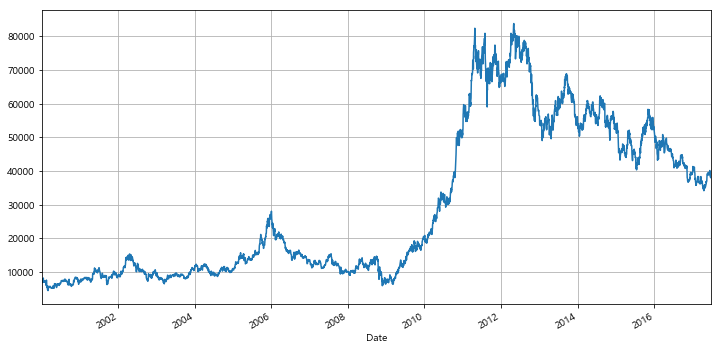

In [22]:
KIA['Close'].plot(figsize=(12, 6), grid=True)

In [23]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,38700.0,39350.0,38650.0,39100.0,37095.207031,1070783
2016-12-26,39100.0,39350.0,38850.0,39000.0,37000.335938,465612
2016-12-27,39050.0,39700.0,39050.0,39500.0,37474.699219,879686
2016-12-28,38600.0,39100.0,38600.0,38950.0,38011.445313,662314
2016-12-29,38700.0,39400.0,38700.0,39250.0,38304.218750,586340


In [24]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.240234
1,2000-01-05,7248.089844
2,2000-01-06,6935.220215
3,2000-01-07,6778.790039
4,2000-01-10,7091.649902


In [25]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4578,2017-12-25
4579,2017-12-26
4580,2017-12-27
4581,2017-12-28
4582,2017-12-29


In [27]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4578,2017-12-25,35682.073386,27537.842840,44247.121702
4579,2017-12-26,35727.491997,27935.069859,45001.819206
4580,2017-12-27,35696.221174,27662.091060,44596.272362
4581,2017-12-28,35661.764317,27315.804403,44165.905152
4582,2017-12-29,35598.025476,27416.274490,44802.308846


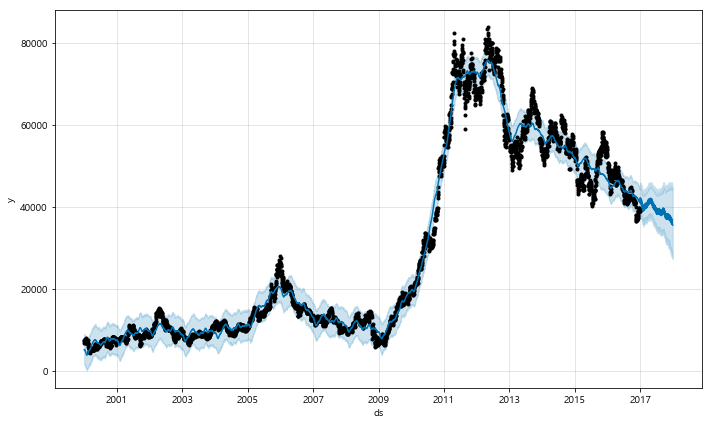

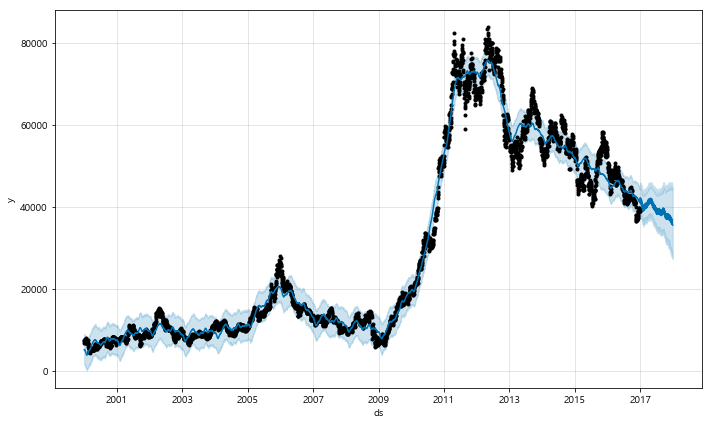

In [28]:
m.plot(forecast)

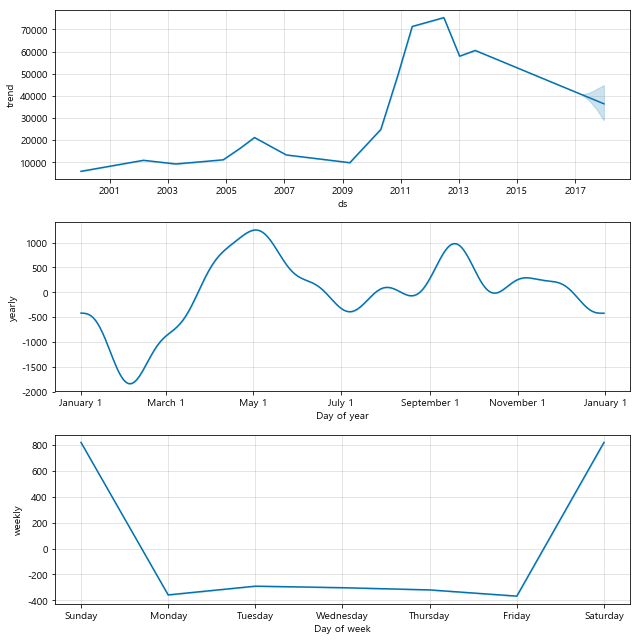

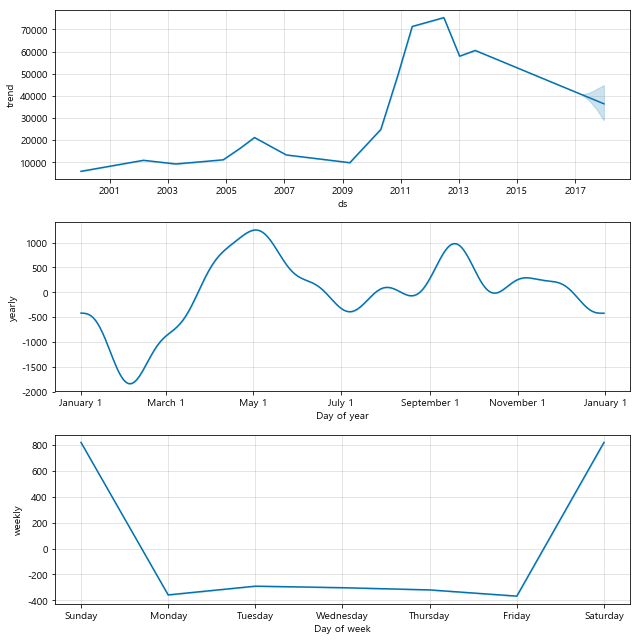

In [29]:
m.plot_components(forecast)

###### 기아차 단기시계열 분석

[*********************100%***********************]  1 of 1 downloaded


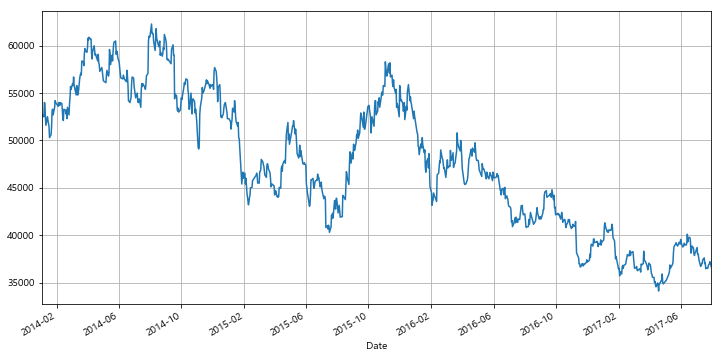

In [30]:
start_date = '2014-1-1'
end_date = '2017-7-31'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12, 6), grid=True)

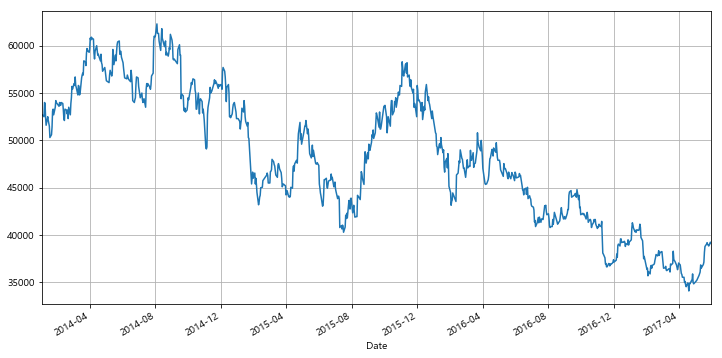

In [31]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12, 6), grid=True)

In [32]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [33]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


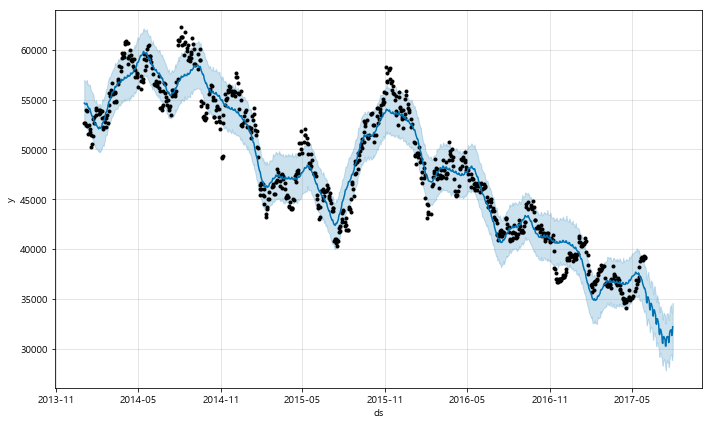

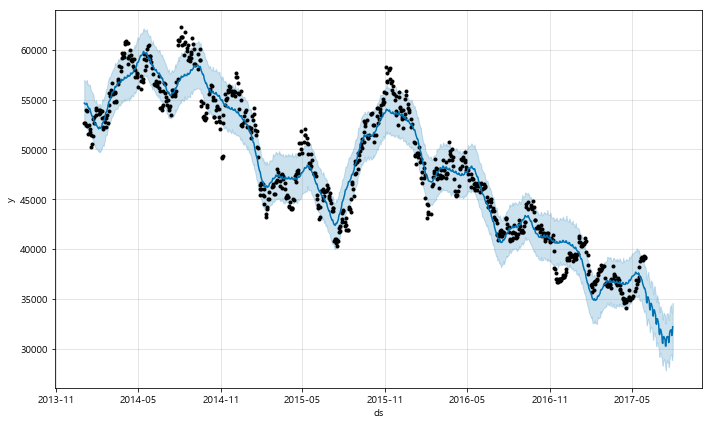

In [35]:
forecast = m.predict(future)
m.plot(forecast)

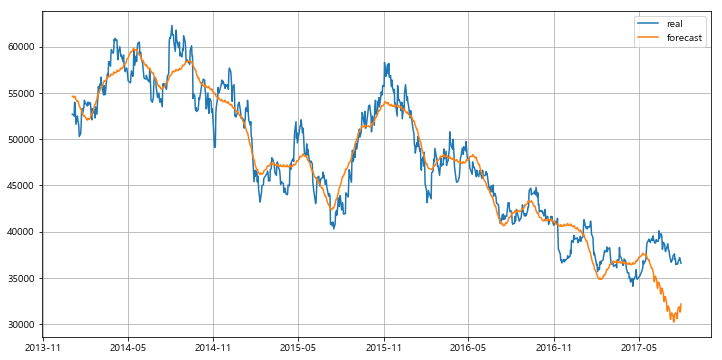

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## Growth Model

In [37]:
df = pd.read_csv('./data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


In [38]:
m = Prophet(growth='logistic')
m.fit(df)

ValueError: Capacities must be supplied for logistic growth in column 'cap'

In [39]:
df['cap'] = 8.5
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


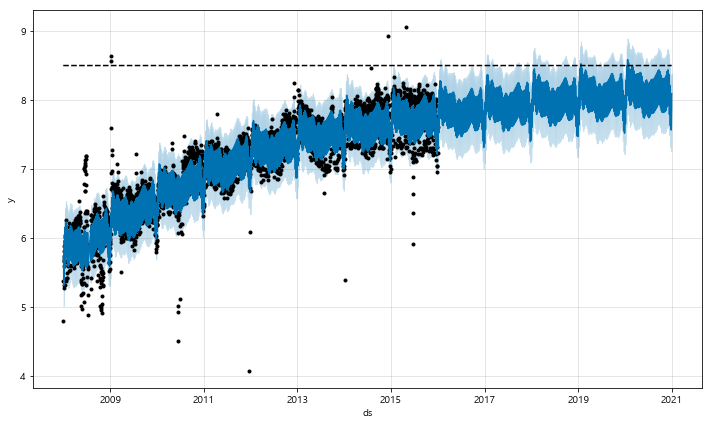

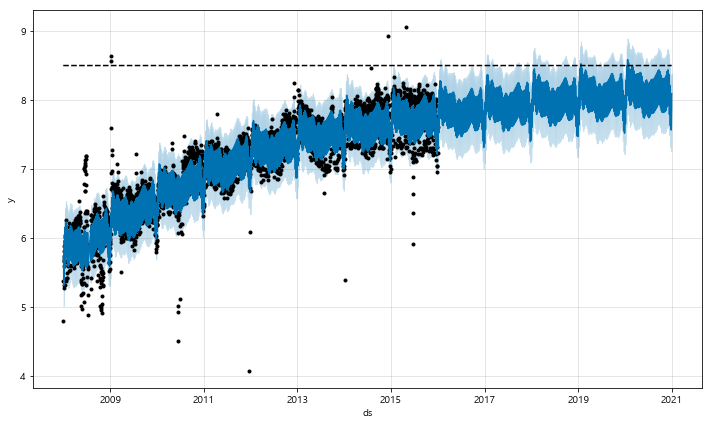

In [40]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
forecast = m.predict(future)
m.plot(forecast)

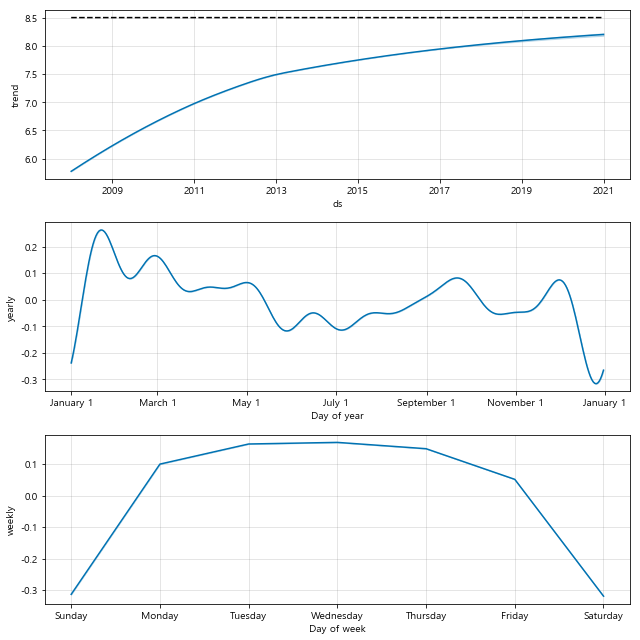

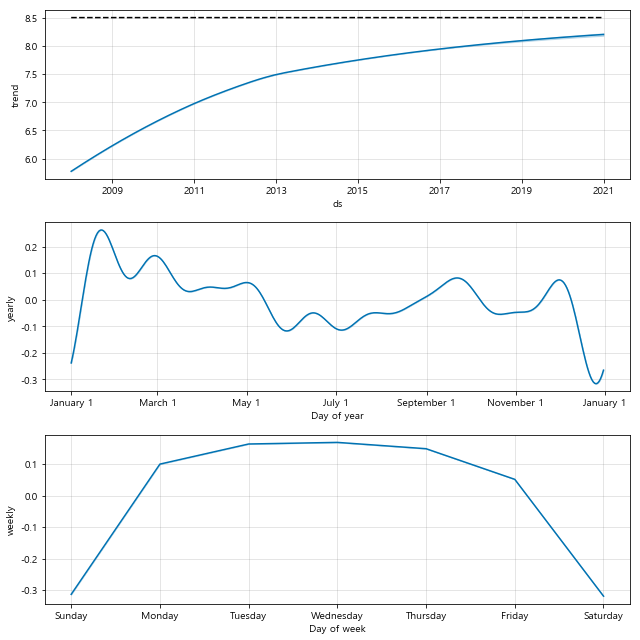

In [41]:
m.plot_components(forecast)

##  Holiday Forecast

In [42]:
df = pd.read_csv('./data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


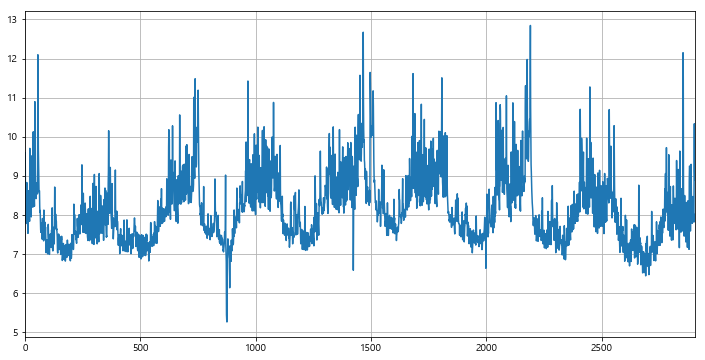

In [43]:
df.y.plot(figsize=(12, 6), grid=True)

###### without holiday

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


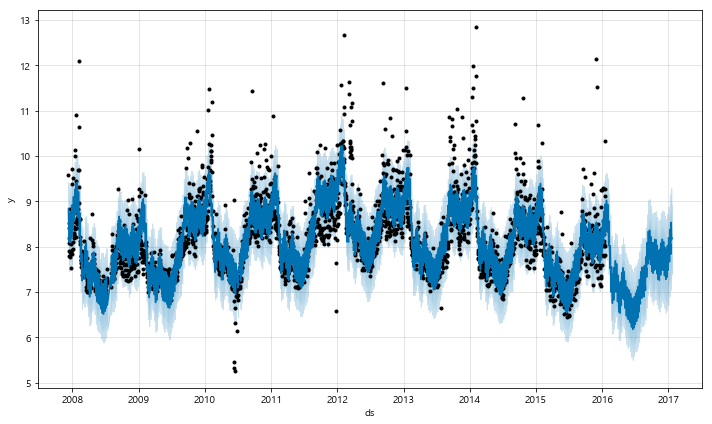

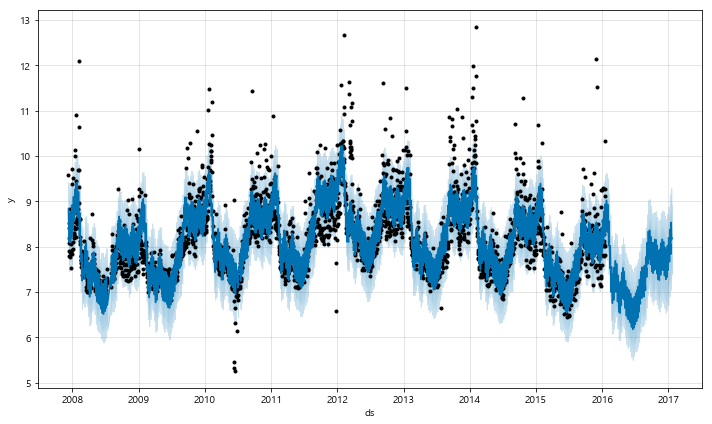

In [44]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=366)
forecast = m.predict(future)
m.plot(forecast)

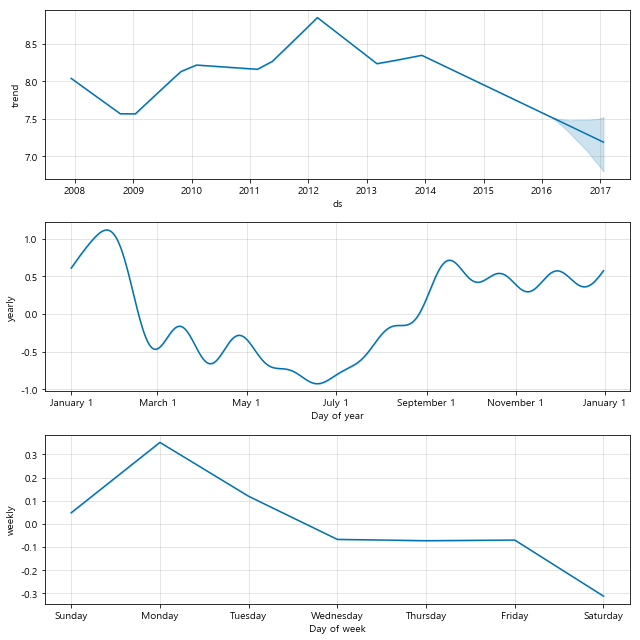

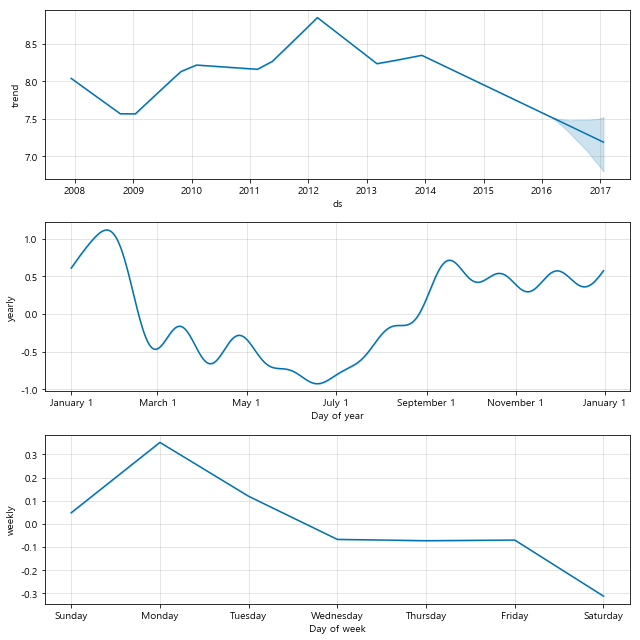

In [45]:
m.plot_components(forecast)

###### with holiday

In [46]:
playoffs = pd.DataFrame({
    'holiday':'playoff',
    'ds':pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
    'lower_window':0,
    'upper_window':1
})
superbowls = pd.DataFrame({
    'holiday':'superbowl',
    'ds' : pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
    'lower_window':0,
    'upper_window':1,
})
holidays = pd.concat((playoffs, superbowls))
holidays.tail()

,ds,holiday,lower_window,upper_window
12,2016-01-24,playoff,0,1
13,2016-02-07,playoff,0,1
0,2010-02-07,superbowl,0,1
1,2014-02-02,superbowl,0,1
2,2016-02-07,superbowl,0,1


In [47]:
m_holiday = Prophet(holidays=holidays)
m_holiday.fit(df)
future.head()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


In [48]:
forecast_holiday = m_holiday.predict(future)
forecast_holiday.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,superbowl,superbowl_lower,superbowl_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2007-12-10,8.048995,8.048995,8.048995,8.272682,9.414046,0.795231,0.795231,0.795231,0.0,...,0.0,0.0,0.0,0.329697,0.329697,0.329697,0.465534,0.465534,0.465534,8.844226
1,2007-12-11,8.047361,8.047361,8.047361,8.018520,9.196760,0.584254,0.584254,0.584254,0.0,...,0.0,0.0,0.0,0.133018,0.133018,0.133018,0.451236,0.451236,0.451236,8.631616
2,2007-12-12,8.045728,8.045728,8.045728,7.802965,9.009115,0.384616,0.384616,0.384616,0.0,...,0.0,0.0,0.0,-0.053211,-0.053211,-0.053211,0.437827,0.437827,0.437827,8.430344
3,2007-12-13,8.044095,8.044095,8.044095,7.858237,8.978355,0.366439,0.366439,0.366439,0.0,...,0.0,0.0,0.0,-0.059211,-0.059211,-0.059211,0.425650,0.425650,0.425650,8.410534
4,2007-12-14,8.042462,8.042462,8.042462,7.802440,8.956871,0.358640,0.358640,0.358640,0.0,...,0.0,0.0,0.0,-0.056366,-0.056366,-0.056366,0.415006,0.415006,0.415006,8.401102


In [49]:
forecast_holiday[(forecast_holiday['playoff'] + forecast_holiday['superbowl'])>0][
    ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.226523,1.198971
2191,2014-02-03,1.904732,1.450723
2532,2015-01-11,1.226523,0.000000
2533,2015-01-12,1.904732,0.000000
2901,2016-01-17,1.226523,0.000000
2902,2016-01-18,1.904732,0.000000
2908,2016-01-24,1.226523,0.000000
2909,2016-01-25,1.904732,0.000000
2922,2016-02-07,1.226523,1.198971
2923,2016-02-08,1.904732,1.450723


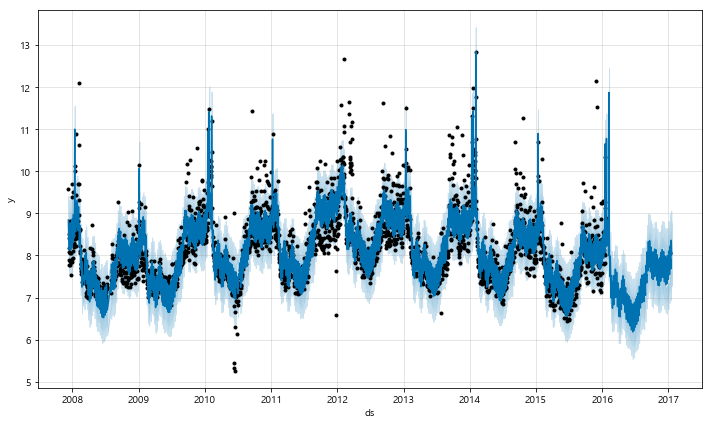

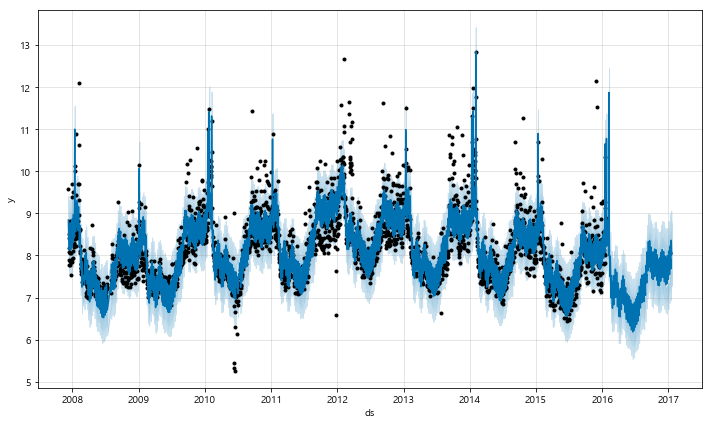

In [50]:
m_holiday.plot(forecast_holiday)

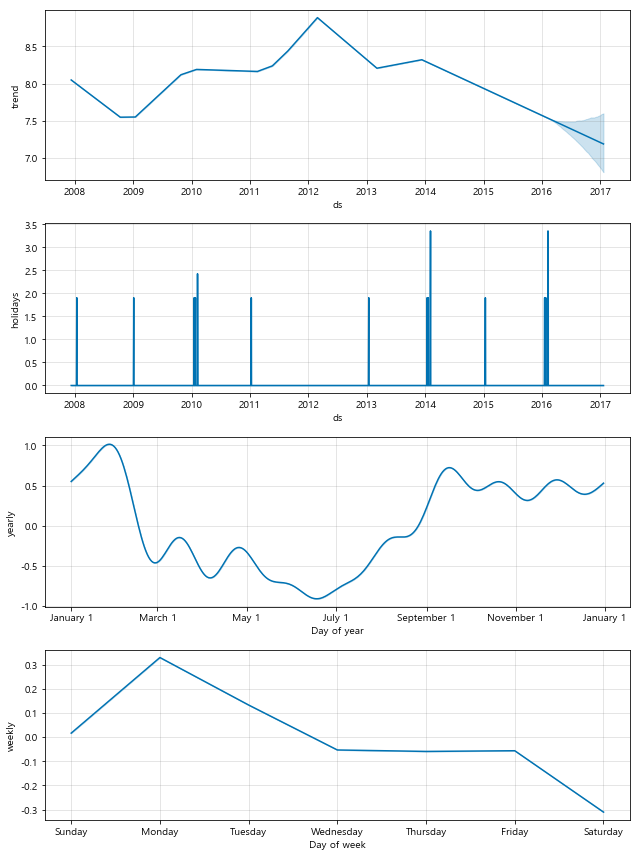

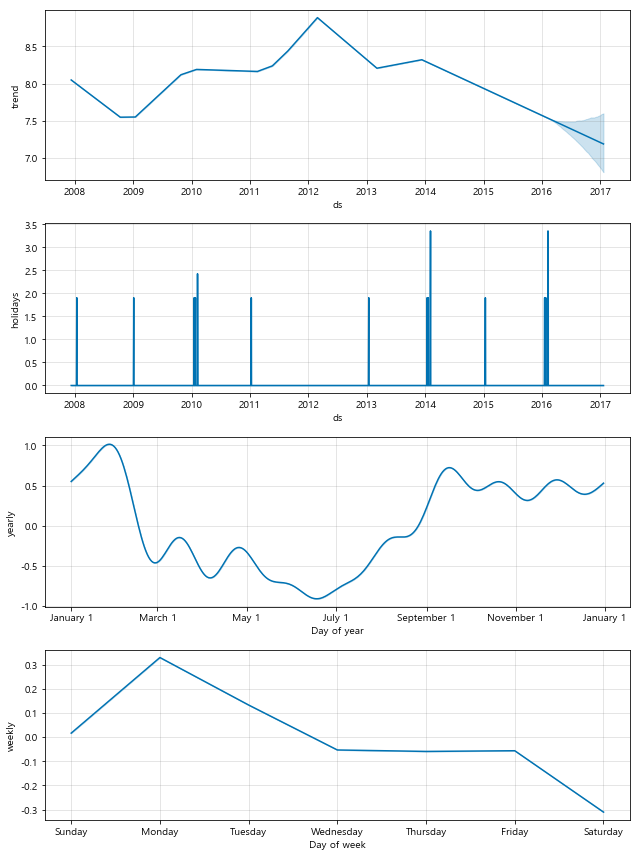

In [51]:
m_holiday.plot_components(forecast_holiday)